Import libraries

In [1]:
import os
import sys
from getpass import getpass
import git
import torch.optim as optim

Configure Environment

In [2]:
os.environ["ENVIRONMENT"] = "windows"
os.environ["REPO_DIR"] = git.Repo(search_parent_directories=True).git.rev_parse("--show-toplevel")
os.environ["ROOT_DIR"] = os.path.abspath(os.path.join(os.getenv("REPO_DIR"), os.pardir))
os.environ["MODEL_ID"] = "32j3pqu5"
os.environ["MODEL_DIR"] = f"{os.getenv('REPO_DIR')}/models/model_{os.getenv('MODEL_ID')}"

Import Repository Resources

In [3]:
sys.path.insert(0, f"{os.getenv('REPO_DIR')}/src")
from helpers import *

sys.path.insert(0, f"{os.getenv('MODEL_DIR')}/src")
from methods import *
from architecture import *
from dataset import *

Download Datasets

In [4]:
dbx_access_token = getpass("Enter your DropBox access token: ")

In [5]:
# download_datasets_from_dropbox(
#     dbx_access_token = dbx_access_token,
#     include_all_datasets = True,
#     use_thread = True
# )

Code

In [6]:
num_epochs = 500
batch_size = 50
val_batch_size = 25
lookback = {"count": 0, "stride": 3}

In [7]:
device = set_device()
model = initialize_model(
    device = device,
    dbx_access_token = dbx_access_token,
    lookback = lookback,
)

train_dataset, val_dataset = create_datasets(
    device = device,
    include_all_datasets = False,
    include_real_world_datasets = True,
    val_ratio = .2,
    lookback = lookback
)

train_dataloader, val_dataloader = create_dataloaders(
    train_dataset = train_dataset,
    val_dataset = val_dataset,
    batch_size = batch_size,
    val_batch_size = val_batch_size
)

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = nn.CrossEntropyLoss()

Using GPU!
Downloaded model weights from Dropbox.


In [8]:
model, train_loss_hist, val_performance_hist, best_val_performance = training_loop(
    model = model,
    criterion = criterion,
    optimizer = optimizer,
    train_dataloader = train_dataloader,
    val_dataloader = val_dataloader,
    dbx_access_token = dbx_access_token,
    num_epochs = num_epochs
)

Training:   0%|          | 0/500 [00:00<?, ?epoch/s]

[EPOCH 1/500]  Train Loss: 0.5086  <>  Val Accuracy: 26.17%  <>  Val Mean IoU: 11.22%
[EPOCH 5/500]  Train Loss: 0.4354  <>  Val Accuracy: 22.99%  <>  Val Mean IoU: 10.05%
[EPOCH 10/500]  Train Loss: 0.3536  <>  Val Accuracy: 23.54%  <>  Val Mean IoU: 10.32%
[EPOCH 12/500]  No improvement in validation Accuracy for 10 epochs
[EPOCH 15/500]  Train Loss: 0.3165  <>  Val Accuracy: 23.38%  <>  Val Mean IoU: 10.31%
[EPOCH 20/500]  Train Loss: 0.2570  <>  Val Accuracy: 24.25%  <>  Val Mean IoU: 10.63%
[EPOCH 22/500]  No improvement in validation Accuracy for 20 epochs
[EPOCH 25/500]  Train Loss: 0.2210  <>  Val Accuracy: 24.36%  <>  Val Mean IoU: 10.74%
[EPOCH 30/500]  Train Loss: 0.1934  <>  Val Accuracy: 25.31%  <>  Val Mean IoU: 11.09%
[EPOCH 32/500]  No improvement in validation Accuracy for 30 epochs
[EPOCH 35/500]  Train Loss: 0.1695  <>  Val Accuracy: 25.15%  <>  Val Mean IoU: 11.02%
[EPOCH 40/500]  Train Loss: 0.1471  <>  Val Accuracy: 24.04%  <>  Val Mean IoU: 10.59%
[EPOCH 42/500] 

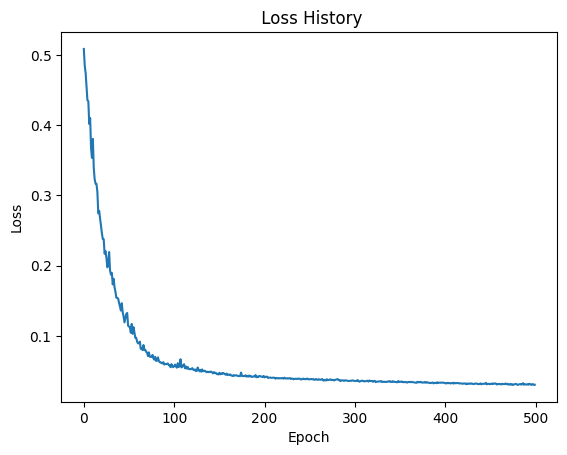

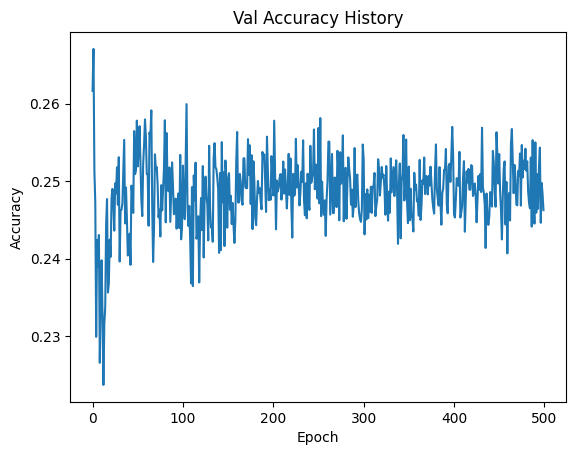

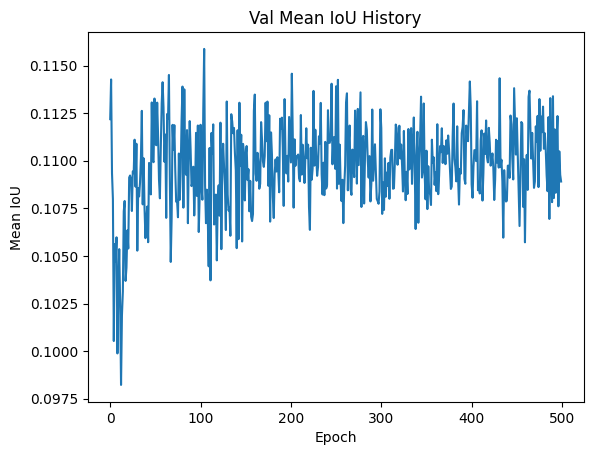

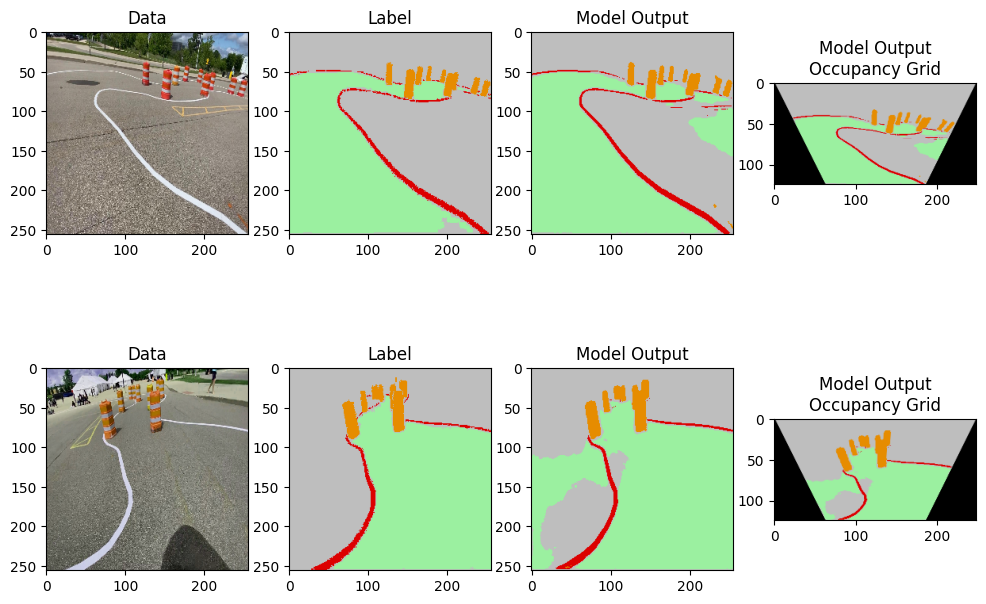

In [9]:
graph_loss_history(train_loss_hist)

graph_performance_history(
    performance_hist = val_performance_hist,
    split = "Val",
    metrics = ["Accuracy", "Mean IoU"]
)

show_sample_results(
    model = model,
    dataset = val_dataset,
    device = device,
    num_samples = 2
)

Testing on UNFINISHED_comp23_4_mini_benchmark:   0%|          | 0/30 [00:00<?, ? frame/s]


UNFINISHED_comp23_4_mini_benchmark metrics:
	Accuracy: 0.2357
	Background Precision: 0.2128
	Background Recall: 0.3318
	Background Specificity: 0.7107
	Background F1 Score: 0.2593
	Background IoU: 0.1490
	Background Dice Coefficient: 0.2593
	Lane Lines Precision: 0.0212
	Lane Lines Recall: 0.2220
	Lane Lines Specificity: 0.7881
	Lane Lines F1 Score: 0.0388
	Lane Lines IoU: 0.0198
	Lane Lines Dice Coefficient: 0.0388
	Drivable Area Precision: 0.6776
	Drivable Area Recall: 0.1979
	Drivable Area Specificity: 0.8164
	Drivable Area F1 Score: 0.3063
	Drivable Area IoU: 0.1809
	Drivable Area Dice Coefficient: 0.3063
	Cones Precision: 0.1248
	Cones Recall: 0.2899
	Cones Specificity: 0.7015
	Cones F1 Score: 0.1745
	Cones IoU: 0.0956
	Cones Dice Coefficient: 0.1745
	Mean IoU: 0.1113
	Mean Dice Coefficient: 0.1947

Metrics saved in performance.json for benchmark "UNFINISHED_comp23_4_mini_benchmark".


Testing on UNFINISHED_comp23_4_mini_benchmark_duplicate:   0%|          | 0/30 [00:00<?, ? frame/s]


UNFINISHED_comp23_4_mini_benchmark_duplicate metrics:
	Accuracy: 0.2357
	Background Precision: 0.2128
	Background Recall: 0.3318
	Background Specificity: 0.7107
	Background F1 Score: 0.2593
	Background IoU: 0.1490
	Background Dice Coefficient: 0.2593
	Lane Lines Precision: 0.0212
	Lane Lines Recall: 0.2220
	Lane Lines Specificity: 0.7881
	Lane Lines F1 Score: 0.0388
	Lane Lines IoU: 0.0198
	Lane Lines Dice Coefficient: 0.0388
	Drivable Area Precision: 0.6776
	Drivable Area Recall: 0.1979
	Drivable Area Specificity: 0.8164
	Drivable Area F1 Score: 0.3063
	Drivable Area IoU: 0.1809
	Drivable Area Dice Coefficient: 0.3063
	Cones Precision: 0.1248
	Cones Recall: 0.2899
	Cones Specificity: 0.7015
	Cones F1 Score: 0.1745
	Cones IoU: 0.0956
	Cones Dice Coefficient: 0.1745
	Mean IoU: 0.1113
	Mean Dice Coefficient: 0.1947

Metrics saved in performance.json for benchmark "UNFINISHED_comp23_4_mini_benchmark_duplicate".


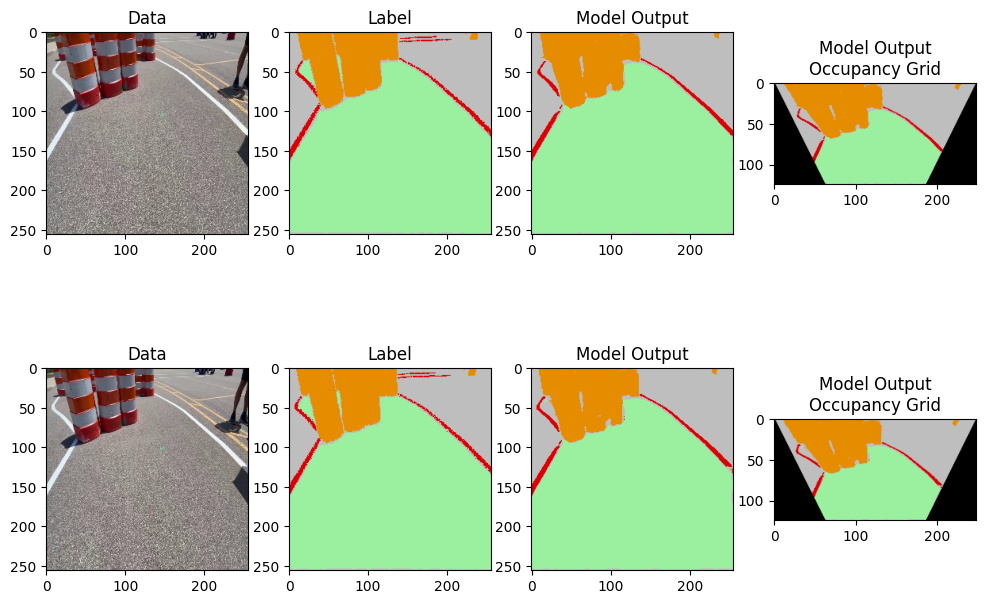

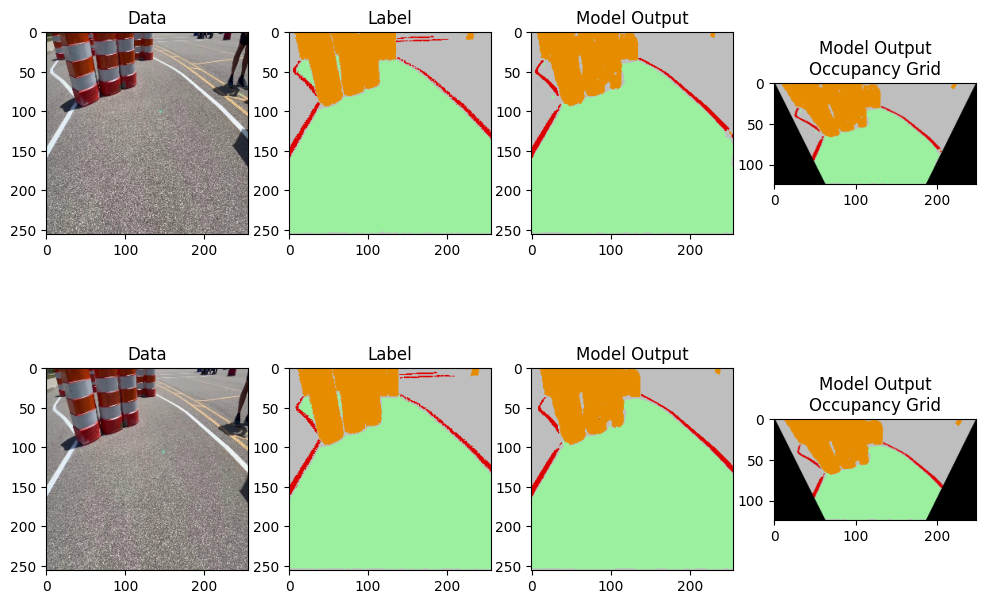

In [10]:
test_model_on_benchmarks(
    model = model,
    device = device,
    all_benchmarks = True,
    num_sample_results = 2,
    lookback = lookback
)